In [133]:
import numpy as numpy
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import 

In [134]:
df=pd.read_csv("/content/diabetes.csv")

In [135]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
44,7,159,64,0,0,27.4,0.294,40,0
573,2,98,60,17,120,34.7,0.198,22,0
256,3,111,56,39,0,30.1,0.557,30,0
170,6,102,82,0,0,30.8,0.180,36,1
480,3,158,70,30,328,35.5,0.344,35,1


In [136]:
X=df.iloc[:,0:8]

In [137]:
X.shape

(768, 8)

In [138]:
y=df.iloc[:,-1]

In [139]:
y.shape

(768,)

In [140]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [141]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [142]:
  df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [143]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [144]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [145]:
type(X_train)

numpy.ndarray

In [146]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [148]:
df.duplicated().sum()

0

In [149]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [150]:
model=Sequential()
model.add(Dense(32,input_dim=8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [151]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [152]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),batch_size=30)

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 0.7347 - accuracy: 0.4618 - val_loss: 0.7231 - val_accuracy: 0.5365
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.6181 - val_loss: 0.6629 - val_accuracy: 0.6615
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.7135 - val_loss: 0.6186 - val_accuracy: 0.7135
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5675 - accuracy: 0.7465 - val_loss: 0.5895 - val_accuracy: 0.7552
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5388 - accuracy: 0.7622 - val_loss: 0.5668 - val_accuracy: 0.7500
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7639 - val_loss: 0.5501 - val_accuracy: 0.7552
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7691 - val_loss: 0.5389 - val_accuracy: 0.7552
Epoch 8/100


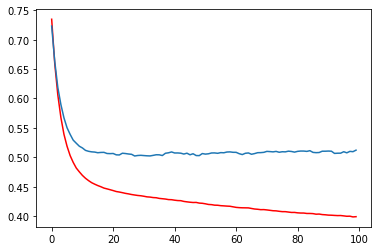

In [153]:
plt.plot(history.history['loss'],c='r')
plt.plot(history.history['val_loss'])

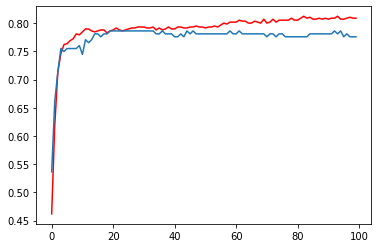

In [154]:

plt.plot(history.history['accuracy'],c='r')
plt.plot(history.history['val_accuracy'])

In [155]:
# 1.How to select appropriate optimizer
# 2.How to select number of node in layer
# 3.How to select number of node
# 4.All in one model

In [156]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
import keras_tuner as kt

## **Hyperparameter tuning in Optimizer**

In [132]:
def build_model(hp):
    model=Sequential()
    counter=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter==0:
            model.add(
                Dense(
                  hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                  activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                  input_dim=8
                )
            )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            model.add(
                Dense(
                  hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                  activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),
                  
                )
            )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
        counter=counter+1
    model.add(Dense(1,activation='sigmoid'))
    optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta'])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

    return model

            
     

In [158]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mkdir',project_name='final4')

In [159]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.6614583134651184

Best val_accuracy So Far: 0.7135416865348816
Total elapsed time: 00h 00m 16s


In [160]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 112,
 'activation0': 'relu',
 'dropout0': 0.8,
 'optimizer': 'sgd',
 'units1': 16,
 'activation1': 'relu',
 'dropout1': 0.5,
 'units2': 40,
 'activation2': 'relu',
 'dropout2': 0.2,
 'units3': 80,
 'activation3': 'tanh',
 'dropout3': 0.7,
 'units4': 112,
 'activation4': 'sigmoid',
 'dropout4': 0.9,
 'units5': 40,
 'activation5': 'tanh',
 'dropout5': 0.3,
 'units6': 48,
 'activation6': 'sigmoid',
 'dropout6': 0.3,
 'units7': 64,
 'activation7': 'tanh',
 'dropout7': 0.7,
 'units8': 24,
 'activation8': 'tanh',
 'dropout8': 0.7}

In [161]:
model1=tuner.get_best_models(num_models=1)[0]

In [162]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               1008      
                                                                 
 dropout (Dropout)           (None, 112)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 113       
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [163]:
history2=model1.fit(X_train,y_train,epochs=100,initial_epoch=6,validation_data=(X_test,y_test),batch_size=30)

Epoch 7/100
20/20 [==============================] - 1s 25ms/step - loss: 0.6806 - accuracy: 0.6128 - val_loss: 0.5801 - val_accuracy: 0.7135
Epoch 8/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6534 - accuracy: 0.6337 - val_loss: 0.5706 - val_accuracy: 0.7500
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6370 - accuracy: 0.6615 - val_loss: 0.5623 - val_accuracy: 0.7500
Epoch 10/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.6979 - val_loss: 0.5555 - val_accuracy: 0.7656
Epoch 11/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6024 - accuracy: 0.6684 - val_loss: 0.5484 - val_accuracy: 0.7708
Epoch 12/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5827 - accuracy: 0.7118 - val_loss: 0.5422 - val_accuracy: 0.7708
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6088 - accuracy: 0.6667 - val_loss: 0.5380 - val_accuracy: 0.7656
Epoch 1

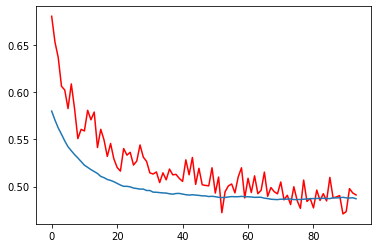

In [164]:
plt.plot(history2.history['loss'],c='r')
plt.plot(history2.history['val_loss'])


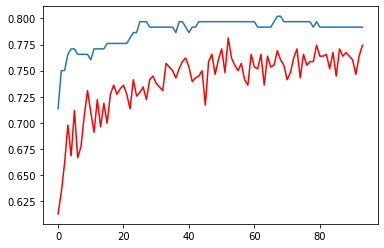

In [165]:
plt.plot(history2.history['accuracy'],c='r')
plt.plot(history2.history['val_accuracy'])

In [166]:
y_log=model1.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [168]:
import numpy as np
y_pred=np.where(y_log>0.5,1,0)

In [172]:
from sklearn.metrics import r2_score,accuracy_score

In [173]:
r2_score(y_pred,y_test)

-0.12692589875275107

In [174]:
accuracy_score(y_pred,y_test)

0.7916666666666666